<a href="https://colab.research.google.com/github/jmhuer/utaustin_QuantumInfo/blob/main/calculator2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit

     |████████████████████████████████| 6.5 MB 13.6 MB/s 
     |████████████████████████████████| 18.0 MB 237 kB/s 
     |████████████████████████████████| 240 kB 59.8 MB/s 
     |████████████████████████████████| 200 kB 51.8 MB/s 
     |████████████████████████████████| 112 kB 51.8 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 1.6 MB 45.4 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
     |████████████████████████████████| 943 kB 50.7 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
     |████████████████████████████████| 4.0 MB 40.5 MB/s 
     |████████████████████████████████| 112 kB 62.7 MB/s 
  Created wheel for qiskit: filename=qiskit-0.36.1-py3-none-any.whl size=11887 sha256=95fb606771258e3a2dede1467c333790a0c3ef46ca88ac605eb5f67e90077958
  Stored in directory: /root/.cache/pip/whe

# Calculate density matrix from mixed state distribution


In [2]:
import qiskit.quantum_info as qi
from qiskit.opflow import (StateFn, Zero, One, Plus, Minus, H,
                           DictStateFn, VectorStateFn, CircuitStateFn, OperatorStateFn)
from qiskit.quantum_info import Statevector

from math import *

i = Statevector([1/sqrt(2), 0,0, 0]) - Statevector([0, 0,0, 1/sqrt(2)])
rho_H = qi.DensityMatrix(i)

i2 = Statevector([0, 1/sqrt(2),0, 0]) + Statevector([0, 0,1/sqrt(2), 0])
rho_H2 = qi.DensityMatrix(i2)

final_density = (1/2)*rho_H+(1/2)*rho_H2
final_density.draw('latex', prefix='\\rho_H = ')


<IPython.core.display.Latex object>

# Reduced matrix


In [3]:
phi =  \
Statevector([(1/(2*sqrt(2)))*sqrt(3),0,0,0]) + \
Statevector([0,(1/(2*sqrt(2)))*sqrt(3),0,0]) +  \
Statevector([0,0,(1/(2*sqrt(2)))*1,0])       -   \
Statevector([0,0,0,(1/(2*sqrt(2)))*1])

rho_B = qi.partial_trace(phi,[1])
rho_A = qi.partial_trace(phi,[0])

display(rho_A.draw('latex', prefix=" \\rho_{A} = "), rho_B.draw('latex', prefix=" \\rho_{B} = ") )



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Entropy

In [4]:
from qiskit.quantum_info import entropy, DensityMatrix


# Density matrix object
s3 = entropy(rho_B)  
print(s3)

# Statevector as list
s1 = entropy([1/sqrt(2), 1/sqrt(2), 0, 0])  
print(s1)


0.8112781244591332
0


In [5]:
import qiskit.quantum_info as qi
from qiskit.opflow import (StateFn, Zero, One, Plus, Minus, H,
                           DictStateFn, VectorStateFn, CircuitStateFn, OperatorStateFn)
from math import *

i = Statevector([1/sqrt(2), 0,0, 0]) - Statevector([0, 0,0, 1/sqrt(2)])
rho_H = qi.DensityMatrix(i)

i2 = Statevector([0, 1/sqrt(2),0, 0]) + Statevector([0, 0,1/sqrt(2), 0])
rho_H2 = qi.DensityMatrix(i2)

final_density = (1/2)*rho_H+(1/2)*rho_H2
final_density.draw('latex', prefix='\\rho_H = ')


<IPython.core.display.Latex object>

# Calulating probabilities


In [6]:
phi =  \
Statevector([(1/(2*sqrt(2)))*sqrt(3),0,0,0]) + \
Statevector([0,(1/(2*sqrt(2)))*sqrt(3),0,0]) +  \
Statevector([0,0,(1/(2*sqrt(2)))*1,0])       -   \
Statevector([0,0,0,(1/(2*sqrt(2)))*1])

probabilities = phi.probabilities_dict()
print(probabilities)

#what is the probability alice (first bit) is 1?
print("ALICE")
print(probabilities['10'] +probabilities['11'])

#what is the probability bob (second bit) is 1?
print("BOB")
print(probabilities['01'] +probabilities['11'])


{'00': 0.37499999999999994, '01': 0.37499999999999994, '10': 0.12499999999999997, '11': 0.12499999999999997}
ALICE
0.24999999999999994
BOB
0.4999999999999999


# SVD Decomposition




In [7]:
from numpy import linalg as LA
import numpy as np
from numpy.linalg import svd as SVD

g  = qi.DensityMatrix(phi)

display(rho_A.draw('latex', prefix=" \\rho_{A} = "), rho_B.draw('latex', prefix=" \\rho_{B} = ") )

g.draw('latex', prefix='\\rho_H = ')


u, s, vh = SVD(rho_A.data)

new_rowA = np.dot(u * s, vh)
# print(new_rowA)


print("Eigenvalas")
print(u)
u, s, vh  = qi.DensityMatrix(u),qi.DensityMatrix(s),qi.DensityMatrix(vh)
s.draw('latex', prefix='\\ S = ')



# print("Eigenvectors")
# print(v)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Eigenvalas
[[-1.00000000e+00+0.j  2.58379842e-18+0.j]
 [ 2.58379842e-18+0.j  1.00000000e+00+0.j]]


<IPython.core.display.Latex object>

#Tesor products and density 


###say you want to see possible matrices of outer products of baiss states



In [8]:
#say you want to see possible matrices of outer products of baiss states
#didnt work 
# rho_m = 1/2*(qi.DensityMatrix.from_label('0') + qi.DensityMatrix.from_label('+'))

rho_m = qi.DensityMatrix(i2)
display(rho_m.draw('latex', prefix='\\rho_m = '))
# display(state.draw('latex', prefix='\\rho_m = '))


<IPython.core.display.Latex object>

In [9]:
#say you want to see possible matrices of outer products of baiss states
g =(sqrt(3)*Zero^Plus)/2

rho_m2 = 1/2*(qi.DensityMatrix.from_label('0') + qi.DensityMatrix.from_label('+'))
rho_m2 = qi.DensityMatrix(g.to_matrix()) 
display(rho_m.draw('latex', prefix='\\rho_m = '))


<IPython.core.display.Latex object>

In [10]:
f = (sqrt(3)*Zero^Plus)/2

g = (One^Minus)/2

state = Statevector(f.to_matrix() + g.to_matrix())

display(state.draw('latex', prefix='\\rho_m = '))


<IPython.core.display.Latex object>

# Now lets calulate partial trace on 1st (A) and second qubit (B)

In [11]:
rho_B = qi.partial_trace(rho_m,[0])
rho_A = qi.partial_trace(rho_m,[1])

display(rho_B.draw('latex', prefix=" \\rho_{B} = "),
        rho_A.draw('latex', prefix=" \\rho_{A} = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [12]:
s.draw('latex', prefix='\\ S = ')

h = Zero^Plus
print(h.to_matrix())

h = One^Minus
print(h.to_matrix())

[0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]
[ 0.        +0.0e+00j -0.        +0.0e+00j  0.70710678-8.7e-17j
 -0.70710678+8.7e-17j]


In [13]:
vh.draw('latex', prefix='\\ VN = ')

<IPython.core.display.Latex object>

# Building circuits 


Statevector([0.57735027+0.j, 0.57735027+0.j, 0.57735027+0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))


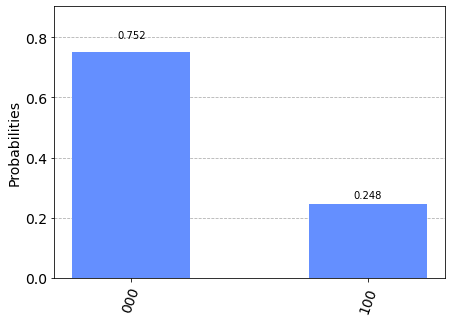

In [131]:
from qiskit import *
from qiskit import QuantumCircuit, execute
from qiskit.providers.aer import QasmSimulator

meas = QuantumCircuit(3, 3)
# Add a H gate on qubit 0, putting this qubit in superposition.
meas.initialize([1,0,0,0,0,0,0,0])

meas.h(0)
meas.h(1)
meas.ccx(0,1,2)

meas.measure(2,2)
meas.save_statevector()

backend = QasmSimulator()
backend_options = {'method': 'statevector'}
job = execute(meas, backend, backend_options=backend_options)
job_result = job.result()
print(job_result.get_statevector(meas))

counts = job_result.get_counts(meas)
plot_histogram(counts)

In [129]:
meas.draw()


┌──────────────────────────────┐┌───┐         ░ 
q_0: ┤0                             ├┤ H ├──■──────░─
     │                              │├───┤  │      ░ 
q_1: ┤1 Initialize(1,0,0,0,0,0,0,0) ├┤ H ├──■──────░─
     │                              │└───┘┌─┴─┐┌─┐ ░ 
q_2: ┤2                             ├─────┤ X ├┤M├─░─
     └──────────────────────────────┘     └───┘└╥┘ ░ 
c: 3/═══════════════════════════════════════════╩════
                                                2